<a href="https://colab.research.google.com/github/siyeol/Natural-Language-Processing/blob/main/Text_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Software Coaching for Python
# Week 4: Text Data Processing - Homework

Instructor: Kang-Pyo Lee

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/SW_Coaching_for_Python"
my_folder = "SYC"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"
classdata_folder = f"{path}/classdata"

Mounted at /content/gdrive


In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv(f"{classdata_folder}/timeline_NASA.csv", sep="\t")
df

,status_id,created_at,text,retweet_count,favorite_count,is_retweet,retweet_created_at
0,1354552906175934477,Wed Jan 27 22:12:33 +0000 2021,"It once held a lake. And what we're going to do, as soon as we get there, is to explore the rocks that were deposi… https://t.co/UW9wngvx4C",72,462,0,NaN
1,1354549784061865986,Wed Jan 27 22:00:09 +0000 2021,"I asked the team [...] to come up with something that would symbolize, to mark this challenge and thank in particu… https://t.co/QH235r9zjq",50,361,0,NaN
2,1354546326139265030,Wed Jan 27 21:46:25 +0000 2021,"Perseverance is the very first rover designed to seek signs of past microbial life, by collecting and caching rock… https://t.co/nn72OHRVv6",135,870,0,NaN
3,1354542309988327425,Wed Jan 27 21:30:27 +0000 2021,"🔴 LIVE: Tune in for a preview of the next Mars landing! On Feb. 18, our @NASAPersevere rover will arrive at the Red… https://t.co/rHRhIrzXWR",374,1430,0,NaN
4,1354540246436872195,Wed Jan 27 21:22:15 +0000 2021,RT @NASAMars: Don't forget to join us for today's briefing at 4:30pm ET (21:30 UTC): https://t.co/fGItMYWnFR Tag your questions #Countdown…,137,0,1,Wed Jan 27 20:18:56 +0000 2021
...,...,...,...,...,...,...,...
3195,1265370733930307585,Tue May 26 19:54:27 +0000 2020,RT @NASAKennedy: Looking for live views of the launch pad? We got you covered. 🚀👀Check out the rocket that will carry @AstroBehnken and @…,1197,0,1,Tue May 26 19:36:00 +0000 2020
3196,1265365848098816002,Tue May 26 19:35:02 +0000 2020,"For the first time since 2011, we’re sending American astronauts back to space, on an American rocket, from America… https://t.co/FsC1feO84c",622,2614,0,NaN
3197,1265327291468562432,Tue May 26 17:01:49 +0000 2020,LIVE: Want to go behind-the-scenes of #LaunchAmerica?Join our experts on @reddit to ask questions about the missi… https://t.co/p7iqJY4jyX,253,1942,0,NaN
3198,1265327258274840576,Tue May 26 17:01:41 +0000 2020,@brandonleblanc @SpaceX @AmyShiraTeitel See you online! https://t.co/FaQ7K75sBP,2,6,0,NaN


We need to explicitly convert the types of the `text` column to string, so we ensure that they are strings. 

In [3]:
df.text = df.text.astype(str)

pandas.Series.astype: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html

In [4]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

from nltk.util import ngrams
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1\. Add two new columns `sentences` and `num_sentences` to `df`, such that 
- each value in the `sentences` column contains a list of sentences identified from the `text` column value 
- and each value in the `num_sentences` column contains the number of identified sentences. 

In [5]:
# Your answer here
df["sentences"] = df.text.apply(lambda x: nltk.sent_tokenize(x))
df["num_sentences"] = df.sentences.apply(lambda x: len(x))

In [6]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["text", "sentences", "num_sentences"]]

,text,sentences,num_sentences
0,"It once held a lake. And what we're going to do, as soon as we get there, is to explore the rocks that were deposi… https://t.co/UW9wngvx4C","[It once held a lake., And what we're going to do, as soon as we get there, is to explore the rocks that were deposi… https://t.co/UW9wngvx4C]",2
1,"I asked the team [...] to come up with something that would symbolize, to mark this challenge and thank in particu… https://t.co/QH235r9zjq","[I asked the team [...] to come up with something that would symbolize, to mark this challenge and thank in particu… https://t.co/QH235r9zjq]",1
2,"Perseverance is the very first rover designed to seek signs of past microbial life, by collecting and caching rock… https://t.co/nn72OHRVv6","[Perseverance is the very first rover designed to seek signs of past microbial life, by collecting and caching rock… https://t.co/nn72OHRVv6]",1
3,"🔴 LIVE: Tune in for a preview of the next Mars landing! On Feb. 18, our @NASAPersevere rover will arrive at the Red… https://t.co/rHRhIrzXWR","[🔴 LIVE: Tune in for a preview of the next Mars landing!, On Feb. 18, our @NASAPersevere rover will arrive at the Red… https://t.co/rHRhIrzXWR]",2
4,RT @NASAMars: Don't forget to join us for today's briefing at 4:30pm ET (21:30 UTC): https://t.co/fGItMYWnFR Tag your questions #Countdown…,[RT @NASAMars: Don't forget to join us for today's briefing at 4:30pm ET (21:30 UTC): https://t.co/fGItMYWnFR Tag your questions #Countdown…],1
...,...,...,...
3195,RT @NASAKennedy: Looking for live views of the launch pad? We got you covered. 🚀👀Check out the rocket that will carry @AstroBehnken and @…,"[RT @NASAKennedy: Looking for live views of the launch pad?, We got you covered., 🚀👀Check out the rocket that will carry @AstroBehnken and @…]",3
3196,"For the first time since 2011, we’re sending American astronauts back to space, on an American rocket, from America… https://t.co/FsC1feO84c","[For the first time since 2011, we’re sending American astronauts back to space, on an American rocket, from America… https://t.co/FsC1feO84c]",1
3197,LIVE: Want to go behind-the-scenes of #LaunchAmerica?Join our experts on @reddit to ask questions about the missi… https://t.co/p7iqJY4jyX,[LIVE: Want to go behind-the-scenes of #LaunchAmerica?Join our experts on @reddit to ask questions about the missi… https://t.co/p7iqJY4jyX],1
3198,@brandonleblanc @SpaceX @AmyShiraTeitel See you online! https://t.co/FaQ7K75sBP,"[@brandonleblanc @SpaceX @AmyShiraTeitel See you online!, https://t.co/FaQ7K75sBP]",2


2\. Add two new columns `words` and `num_words` to `df`, such that 
- each value in the `words` column contains a list of words identified from the `text` column value
- and each value in the `num_words` column contains the number of identified words. 

In [7]:
# Your answer here
df["words"] = df.text.apply(lambda x: nltk.word_tokenize(x))
df["num_words"] = df.words.apply(lambda x: len(x))

In [8]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["text", "words", "num_words"]]

,text,words,num_words
0,"It once held a lake. And what we're going to do, as soon as we get there, is to explore the rocks that were deposi… https://t.co/UW9wngvx4C","[It, once, held, a, lake, ., And, what, we, 're, going, to, do, ,, as, soon, as, we, get, there, ,, is, to, explore, the, rocks, that, were, depos...",32
1,"I asked the team [...] to come up with something that would symbolize, to mark this challenge and thank in particu… https://t.co/QH235r9zjq","[I, asked, the, team, [, ..., ], to, come, up, with, something, that, would, symbolize, ,, to, mark, this, challenge, and, thank, in, particu…, ht...",27
2,"Perseverance is the very first rover designed to seek signs of past microbial life, by collecting and caching rock… https://t.co/nn72OHRVv6","[Perseverance, is, the, very, first, rover, designed, to, seek, signs, of, past, microbial, life, ,, by, collecting, and, caching, rock…, https, :...",23
3,"🔴 LIVE: Tune in for a preview of the next Mars landing! On Feb. 18, our @NASAPersevere rover will arrive at the Red… https://t.co/rHRhIrzXWR","[🔴, LIVE, :, Tune, in, for, a, preview, of, the, next, Mars, landing, !, On, Feb., 18, ,, our, @, NASAPersevere, rover, will, arrive, at, the, Red...",30
4,RT @NASAMars: Don't forget to join us for today's briefing at 4:30pm ET (21:30 UTC): https://t.co/fGItMYWnFR Tag your questions #Countdown…,"[RT, @, NASAMars, :, Do, n't, forget, to, join, us, for, today, 's, briefing, at, 4:30pm, ET, (, 21:30, UTC, ), :, https, :, //t.co/fGItMYWnFR, Ta...",30
...,...,...,...
3195,RT @NASAKennedy: Looking for live views of the launch pad? We got you covered. 🚀👀Check out the rocket that will carry @AstroBehnken and @…,"[RT, @, NASAKennedy, :, Looking, for, live, views, of, the, launch, pad, ?, We, got, you, covered, ., 🚀👀Check, out, the, rocket, that, will, carry...",30
3196,"For the first time since 2011, we’re sending American astronauts back to space, on an American rocket, from America… https://t.co/FsC1feO84c","[For, the, first, time, since, 2011, ,, we, ’, re, sending, American, astronauts, back, to, space, ,, on, an, American, rocket, ,, from, America…,...",27
3197,LIVE: Want to go behind-the-scenes of #LaunchAmerica?Join our experts on @reddit to ask questions about the missi… https://t.co/p7iqJY4jyX,"[LIVE, :, Want, to, go, behind-the-scenes, of, #, LaunchAmerica, ?, Join, our, experts, on, @, reddit, to, ask, questions, about, the, missi…, htt...",25
3198,@brandonleblanc @SpaceX @AmyShiraTeitel See you online! https://t.co/FaQ7K75sBP,"[@, brandonleblanc, @, SpaceX, @, AmyShiraTeitel, See, you, online, !, https, :, //t.co/FaQ7K75sBP]",13


3\. Add a new column `tagged_words` to `df`, such that each value in the column contains a list of tuples with words and their part-of-speech tags. 

In [9]:
# Your answer here
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

In [10]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["words", "tagged_words"]]

,words,tagged_words
0,"[It, once, held, a, lake, ., And, what, we, 're, going, to, do, ,, as, soon, as, we, get, there, ,, is, to, explore, the, rocks, that, were, depos...","[(It, PRP), (once, RB), (held, VBD), (a, DT), (lake, NN), (., .), (And, CC), (what, WP), (we, PRP), ('re, VBP), (going, VBG), (to, TO), (do, VB), ..."
1,"[I, asked, the, team, [, ..., ], to, come, up, with, something, that, would, symbolize, ,, to, mark, this, challenge, and, thank, in, particu…, ht...","[(I, PRP), (asked, VBD), (the, DT), (team, NN), ([, NN), (..., :), (], VBZ), (to, TO), (come, VB), (up, RP), (with, IN), (something, NN), (that, W..."
2,"[Perseverance, is, the, very, first, rover, designed, to, seek, signs, of, past, microbial, life, ,, by, collecting, and, caching, rock…, https, :...","[(Perseverance, NN), (is, VBZ), (the, DT), (very, RB), (first, JJ), (rover, NN), (designed, VBN), (to, TO), (seek, VB), (signs, NNS), (of, IN), (p..."
3,"[🔴, LIVE, :, Tune, in, for, a, preview, of, the, next, Mars, landing, !, On, Feb., 18, ,, our, @, NASAPersevere, rover, will, arrive, at, the, Red...","[(🔴, JJ), (LIVE, NNP), (:, :), (Tune, NN), (in, IN), (for, IN), (a, DT), (preview, NN), (of, IN), (the, DT), (next, JJ), (Mars, NNP), (landing, NN..."
4,"[RT, @, NASAMars, :, Do, n't, forget, to, join, us, for, today, 's, briefing, at, 4:30pm, ET, (, 21:30, UTC, ), :, https, :, //t.co/fGItMYWnFR, Ta...","[(RT, NNP), (@, NNP), (NASAMars, NNP), (:, :), (Do, VBP), (n't, RB), (forget, VB), (to, TO), (join, VB), (us, PRP), (for, IN), (today, NN), ('s, P..."
...,...,...
3195,"[RT, @, NASAKennedy, :, Looking, for, live, views, of, the, launch, pad, ?, We, got, you, covered, ., 🚀👀Check, out, the, rocket, that, will, carry...","[(RT, NNP), (@, JJ), (NASAKennedy, NN), (:, :), (Looking, VBG), (for, IN), (live, JJ), (views, NNS), (of, IN), (the, DT), (launch, NN), (pad, NN),..."
3196,"[For, the, first, time, since, 2011, ,, we, ’, re, sending, American, astronauts, back, to, space, ,, on, an, American, rocket, ,, from, America…,...","[(For, IN), (the, DT), (first, JJ), (time, NN), (since, IN), (2011, CD), (,, ,), (we, PRP), (’, VBP), (re, JJ), (sending, JJ), (American, JJ), (as..."
3197,"[LIVE, :, Want, to, go, behind-the-scenes, of, #, LaunchAmerica, ?, Join, our, experts, on, @, reddit, to, ask, questions, about, the, missi…, htt...","[(LIVE, NNS), (:, :), (Want, VB), (to, TO), (go, VB), (behind-the-scenes, NNS), (of, IN), (#, #), (LaunchAmerica, NNP), (?, .), (Join, NNP), (our,..."
3198,"[@, brandonleblanc, @, SpaceX, @, AmyShiraTeitel, See, you, online, !, https, :, //t.co/FaQ7K75sBP]","[(@, JJ), (brandonleblanc, NN), (@, NN), (SpaceX, NNP), (@, NNP), (AmyShiraTeitel, NNP), (See, NNP), (you, PRP), (online, VBP), (!, .), (https, NN..."


4\. Add a new column `nouns` to `df`, such that each value in the column contains a list of nouns in the `text` column value. Noun tags start with 'NN'. 

In [11]:
# Your answer here
# for i in range (0,3200):
#   [word for word, tag in df.tagged_words[i] if tag.startswith("NN")]
df["nouns"] = df.tagged_words.apply(lambda x: [word for word, tag in x if tag.startswith("NN")])
# for i in range(0,3200):
#   df["nouns"][i]=[word for word, tag in df.tagged_words[i] if tag.startswith("NN")]

In [12]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["tagged_words", "nouns"]]

,tagged_words,nouns
0,"[(It, PRP), (once, RB), (held, VBD), (a, DT), (lake, NN), (., .), (And, CC), (what, WP), (we, PRP), ('re, VBP), (going, VBG), (to, TO), (do, VB), ...","[lake, rocks, https, //t.co/UW9wngvx4C]"
1,"[(I, PRP), (asked, VBD), (the, DT), (team, NN), ([, NN), (..., :), (], VBZ), (to, TO), (come, VB), (up, RP), (with, IN), (something, NN), (that, W...","[team, [, something, challenge, thank, https, //t.co/QH235r9zjq]"
2,"[(Perseverance, NN), (is, VBZ), (the, DT), (very, RB), (first, JJ), (rover, NN), (designed, VBN), (to, TO), (seek, VB), (signs, NNS), (of, IN), (p...","[Perseverance, rover, signs, life, https, //t.co/nn72OHRVv6]"
3,"[(🔴, JJ), (LIVE, NNP), (:, :), (Tune, NN), (in, IN), (for, IN), (a, DT), (preview, NN), (of, IN), (the, DT), (next, JJ), (Mars, NNP), (landing, NN...","[LIVE, Tune, preview, Mars, landing, Feb., @, NASAPersevere, rover, Red…, https, //t.co/rHRhIrzXWR]"
4,"[(RT, NNP), (@, NNP), (NASAMars, NNP), (:, :), (Do, VBP), (n't, RB), (forget, VB), (to, TO), (join, VB), (us, PRP), (for, IN), (today, NN), ('s, P...","[RT, @, NASAMars, today, briefing, ET, UTC, https, Tag, questions, Countdown…]"
...,...,...
3195,"[(RT, NNP), (@, JJ), (NASAKennedy, NN), (:, :), (Looking, VBG), (for, IN), (live, JJ), (views, NNS), (of, IN), (the, DT), (launch, NN), (pad, NN),...","[RT, NASAKennedy, views, launch, pad, rocket, @, AstroBehnken, @, …]"
3196,"[(For, IN), (the, DT), (first, JJ), (time, NN), (since, IN), (2011, CD), (,, ,), (we, PRP), (’, VBP), (re, JJ), (sending, JJ), (American, JJ), (as...","[time, astronauts, space, rocket, America…, https, //t.co/FsC1feO84c]"
3197,"[(LIVE, NNS), (:, :), (Want, VB), (to, TO), (go, VB), (behind-the-scenes, NNS), (of, IN), (#, #), (LaunchAmerica, NNP), (?, .), (Join, NNP), (our,...","[LIVE, behind-the-scenes, LaunchAmerica, Join, experts, @, reddit, questions, missi…, https, //t.co/p7iqJY4jyX]"
3198,"[(@, JJ), (brandonleblanc, NN), (@, NN), (SpaceX, NNP), (@, NNP), (AmyShiraTeitel, NNP), (See, NNP), (you, PRP), (online, VBP), (!, .), (https, NN...","[brandonleblanc, @, SpaceX, @, AmyShiraTeitel, See, https, //t.co/FaQ7K75sBP]"


5\. Add a new column `stems` to `df`, such that each value in the column contains a list of stems in the `text` column value. Use SnowballStemmer for stemming. 

In [13]:
# Your answer here
stemmer = nltk.stem.SnowballStemmer("english")
#[(word, stemmer.stem(word)) for word in df.words[0]]
df["stems"] = df.words.apply(lambda x: [stemmer.stem(word) for word in x]) #list Comprehension
# [(word, stemmer.stem(word)) for word in df.words[1]]

In [14]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["words", "stems"]]

,words,stems
0,"[It, once, held, a, lake, ., And, what, we, 're, going, to, do, ,, as, soon, as, we, get, there, ,, is, to, explore, the, rocks, that, were, depos...","[it, onc, held, a, lake, ., and, what, we, re, go, to, do, ,, as, soon, as, we, get, there, ,, is, to, explor, the, rock, that, were, deposi…, htt..."
1,"[I, asked, the, team, [, ..., ], to, come, up, with, something, that, would, symbolize, ,, to, mark, this, challenge, and, thank, in, particu…, ht...","[i, ask, the, team, [, ..., ], to, come, up, with, someth, that, would, symbol, ,, to, mark, this, challeng, and, thank, in, particu…, https, :, /..."
2,"[Perseverance, is, the, very, first, rover, designed, to, seek, signs, of, past, microbial, life, ,, by, collecting, and, caching, rock…, https, :...","[persever, is, the, veri, first, rover, design, to, seek, sign, of, past, microbi, life, ,, by, collect, and, cach, rock…, https, :, //t.co/nn72oh..."
3,"[🔴, LIVE, :, Tune, in, for, a, preview, of, the, next, Mars, landing, !, On, Feb., 18, ,, our, @, NASAPersevere, rover, will, arrive, at, the, Red...","[🔴, live, :, tune, in, for, a, preview, of, the, next, mar, land, !, on, feb., 18, ,, our, @, nasapersever, rover, will, arriv, at, the, red…, htt..."
4,"[RT, @, NASAMars, :, Do, n't, forget, to, join, us, for, today, 's, briefing, at, 4:30pm, ET, (, 21:30, UTC, ), :, https, :, //t.co/fGItMYWnFR, Ta...","[rt, @, nasamar, :, do, n't, forget, to, join, us, for, today, 's, brief, at, 4:30pm, et, (, 21:30, utc, ), :, https, :, //t.co/fgitmywnfr, tag, y..."
...,...,...
3195,"[RT, @, NASAKennedy, :, Looking, for, live, views, of, the, launch, pad, ?, We, got, you, covered, ., 🚀👀Check, out, the, rocket, that, will, carry...","[rt, @, nasakennedi, :, look, for, live, view, of, the, launch, pad, ?, we, got, you, cover, ., 🚀👀check, out, the, rocket, that, will, carri, @, a..."
3196,"[For, the, first, time, since, 2011, ,, we, ’, re, sending, American, astronauts, back, to, space, ,, on, an, American, rocket, ,, from, America…,...","[for, the, first, time, sinc, 2011, ,, we, ’, re, send, american, astronaut, back, to, space, ,, on, an, american, rocket, ,, from, america…, http..."
3197,"[LIVE, :, Want, to, go, behind-the-scenes, of, #, LaunchAmerica, ?, Join, our, experts, on, @, reddit, to, ask, questions, about, the, missi…, htt...","[live, :, want, to, go, behind-the-scen, of, #, launchamerica, ?, join, our, expert, on, @, reddit, to, ask, question, about, the, missi…, https, ..."
3198,"[@, brandonleblanc, @, SpaceX, @, AmyShiraTeitel, See, you, online, !, https, :, //t.co/FaQ7K75sBP]","[@, brandonleblanc, @, spacex, @, amyshirateitel, see, you, onlin, !, https, :, //t.co/faq7k75sbp]"


6\. Add a new column `bigrams` to `df`, such that each value in the column contains a list of bigram strings in the `text` column value.

In [15]:
# Your answer here
from nltk.util import ngrams
df["bigrams"] = df.words.apply(lambda x: [" ".join(gram) for gram in ngrams(x, 2)])

In [16]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["words", "bigrams"]]

,words,bigrams
0,"[It, once, held, a, lake, ., And, what, we, 're, going, to, do, ,, as, soon, as, we, get, there, ,, is, to, explore, the, rocks, that, were, depos...","[It once, once held, held a, a lake, lake ., . And, And what, what we, we 're, 're going, going to, to do, do ,, , as, as soon, soon as, as we, we..."
1,"[I, asked, the, team, [, ..., ], to, come, up, with, something, that, would, symbolize, ,, to, mark, this, challenge, and, thank, in, particu…, ht...","[I asked, asked the, the team, team [, [ ..., ... ], ] to, to come, come up, up with, with something, something that, that would, would symbolize,..."
2,"[Perseverance, is, the, very, first, rover, designed, to, seek, signs, of, past, microbial, life, ,, by, collecting, and, caching, rock…, https, :...","[Perseverance is, is the, the very, very first, first rover, rover designed, designed to, to seek, seek signs, signs of, of past, past microbial, ..."
3,"[🔴, LIVE, :, Tune, in, for, a, preview, of, the, next, Mars, landing, !, On, Feb., 18, ,, our, @, NASAPersevere, rover, will, arrive, at, the, Red...","[🔴 LIVE, LIVE :, : Tune, Tune in, in for, for a, a preview, preview of, of the, the next, next Mars, Mars landing, landing !, ! On, On Feb., Feb. ..."
4,"[RT, @, NASAMars, :, Do, n't, forget, to, join, us, for, today, 's, briefing, at, 4:30pm, ET, (, 21:30, UTC, ), :, https, :, //t.co/fGItMYWnFR, Ta...","[RT @, @ NASAMars, NASAMars :, : Do, Do n't, n't forget, forget to, to join, join us, us for, for today, today 's, 's briefing, briefing at, at 4:..."
...,...,...
3195,"[RT, @, NASAKennedy, :, Looking, for, live, views, of, the, launch, pad, ?, We, got, you, covered, ., 🚀👀Check, out, the, rocket, that, will, carry...","[RT @, @ NASAKennedy, NASAKennedy :, : Looking, Looking for, for live, live views, views of, of the, the launch, launch pad, pad ?, ? We, We got, ..."
3196,"[For, the, first, time, since, 2011, ,, we, ’, re, sending, American, astronauts, back, to, space, ,, on, an, American, rocket, ,, from, America…,...","[For the, the first, first time, time since, since 2011, 2011 ,, , we, we ’, ’ re, re sending, sending American, American astronauts, astronauts b..."
3197,"[LIVE, :, Want, to, go, behind-the-scenes, of, #, LaunchAmerica, ?, Join, our, experts, on, @, reddit, to, ask, questions, about, the, missi…, htt...","[LIVE :, : Want, Want to, to go, go behind-the-scenes, behind-the-scenes of, of #, # LaunchAmerica, LaunchAmerica ?, ? Join, Join our, our experts..."
3198,"[@, brandonleblanc, @, SpaceX, @, AmyShiraTeitel, See, you, online, !, https, :, //t.co/FaQ7K75sBP]","[@ brandonleblanc, brandonleblanc @, @ SpaceX, SpaceX @, @ AmyShiraTeitel, AmyShiraTeitel See, See you, you online, online !, ! https, https :, : ..."


7\. Add two new columns `polarity` and `subjectivity` to `df`, such that 
- each value in the `polarity` column contains the polarity score of the `text` column value 
- and each value in the `subjectivity` column contains the subjectivity score of the `text` column value. 

In [17]:
# Your answer here
df["polarity"] = df.text.apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = df.text.apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [18]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["text", "polarity", "subjectivity"]]

,text,polarity,subjectivity
0,"It once held a lake. And what we're going to do, as soon as we get there, is to explore the rocks that were deposi… https://t.co/UW9wngvx4C",0.000000,0.000000
1,"I asked the team [...] to come up with something that would symbolize, to mark this challenge and thank in particu… https://t.co/QH235r9zjq",0.000000,0.000000
2,"Perseverance is the very first rover designed to seek signs of past microbial life, by collecting and caching rock… https://t.co/nn72OHRVv6",0.037500,0.341667
3,"🔴 LIVE: Tune in for a preview of the next Mars landing! On Feb. 18, our @NASAPersevere rover will arrive at the Red… https://t.co/rHRhIrzXWR",0.068182,0.250000
4,RT @NASAMars: Don't forget to join us for today's briefing at 4:30pm ET (21:30 UTC): https://t.co/fGItMYWnFR Tag your questions #Countdown…,0.000000,0.000000
...,...,...,...
3195,RT @NASAKennedy: Looking for live views of the launch pad? We got you covered. 🚀👀Check out the rocket that will carry @AstroBehnken and @…,0.136364,0.500000
3196,"For the first time since 2011, we’re sending American astronauts back to space, on an American rocket, from America… https://t.co/FsC1feO84c",0.062500,0.083333
3197,LIVE: Want to go behind-the-scenes of #LaunchAmerica?Join our experts on @reddit to ask questions about the missi… https://t.co/p7iqJY4jyX,0.136364,0.500000
3198,@brandonleblanc @SpaceX @AmyShiraTeitel See you online! https://t.co/FaQ7K75sBP,0.000000,0.000000


8\. List the top-50 most common words in the `text` column along with their frequencies, considering only the global English stopwords. You may reuse the `get_counter` function you have used in class.

In [19]:
# Your answer here
from collections import Counter

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                ##########################################################
                # Check the tag
                ##########################################################
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)
        
    return counter

global_stopwords = nltk.corpus.stopwords.words("english") 
counter1 = get_counter(df, global_stopwords)
counter1.most_common(50)

[(':', 3037),
 ('@', 2513),
 ('https', 2290),
 (',', 1460),
 ('.', 1047),
 ('rt', 817),
 ('!', 738),
 ('#', 628),
 ('space_station', 448),
 ("'s", 442),
 ('’', 399),
 ('spacex', 365),
 ('nasa', 319),
 ('launch', 293),
 ('today', 275),
 ('astrobehnken', 268),
 ('?', 253),
 (';', 251),
 ('space', 248),
 ('mission', 246),
 ('&', 244),
 ('amp', 243),
 ('live', 236),
 ('dragon', 200),
 ('crew', 199),
 ('spacecraft', 182),
 ('astro_doug', 180),
 ('nasapersevere', 176),
 ('jimbridenstine', 168),
 ('us', 163),
 ('et', 161),
 ('launchamerica', 161),
 ('earth', 155),
 ('moon', 153),
 ("'re", 150),
 ('mars', 145),
 ('first', 141),
 ('new', 140),
 ('🚀', 129),
 ('astro_seal', 123),
 ('astronauts', 116),
 ('rocket', 115),
 ('nasakennedy', 114),
 ('nasa_astronauts', 103),
 ('the…', 102),
 ('…', 99),
 ('one', 98),
 ('osirisrex', 95),
 ('crew-1', 92),
 ('next', 91)]

9\. Examine the 50 most common words from question 8 and define your own local stopwords in a list named `local_stopwords`. Then, list the top-50 most common words and their frequencies, this time considering both the global and local stopwords. 

In [20]:
# # Your answer here
# from nltk.corpus import stopwords
# global_stopwords = nltk.corpus.stopwords.words("english") 

In [21]:
import string
string.punctuation
local_stopwords = [c for c in string.punctuation] +\
                  ['‘', '’', '—', '…', ':', '🚀','“','...', 'https', "'s", "'re", 'rt']
local_stopwords

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '‘',
 '’',
 '—',
 '…',
 ':',
 '🚀',
 '“',
 '...',
 'https',
 "'s",
 "'re",
 'rt']

In [22]:
from collections import Counter

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)
        
    return counter

global_stopwords = nltk.corpus.stopwords.words("english") 
counter1 = get_counter(df, global_stopwords+local_stopwords)
counter1.most_common(50)

[('space_station', 448),
 ('spacex', 365),
 ('nasa', 319),
 ('launch', 293),
 ('today', 275),
 ('astrobehnken', 268),
 ('space', 248),
 ('mission', 246),
 ('amp', 243),
 ('live', 236),
 ('dragon', 200),
 ('crew', 199),
 ('spacecraft', 182),
 ('astro_doug', 180),
 ('nasapersevere', 176),
 ('jimbridenstine', 168),
 ('us', 163),
 ('et', 161),
 ('launchamerica', 161),
 ('earth', 155),
 ('moon', 153),
 ('mars', 145),
 ('first', 141),
 ('new', 140),
 ('astro_seal', 123),
 ('astronauts', 116),
 ('rocket', 115),
 ('nasakennedy', 114),
 ('nasa_astronauts', 103),
 ('the…', 102),
 ('one', 98),
 ('osirisrex', 95),
 ('crew-1', 92),
 ('next', 91),
 ('go', 91),
 ('artemis', 90),
 ('join', 89),
 ('time', 87),
 ('ready', 86),
 ('years', 85),
 ('week', 83),
 ('spacewalk', 81),
 ('aboard', 81),
 ('test', 80),
 ('thank', 76),
 ('rover', 74),
 ('science', 74),
 ('nasa_sls', 73),
 ('team', 72),
 ('see', 71)]

10\. Draw a word cloud that visualizes the top-100 most common words. You may reuse the `draw_wordcloud` function you have used in class. 

In [23]:
# Your answer here
counter1_mc = counter1.most_common(100)

In [24]:
! pip install --user wordcloud

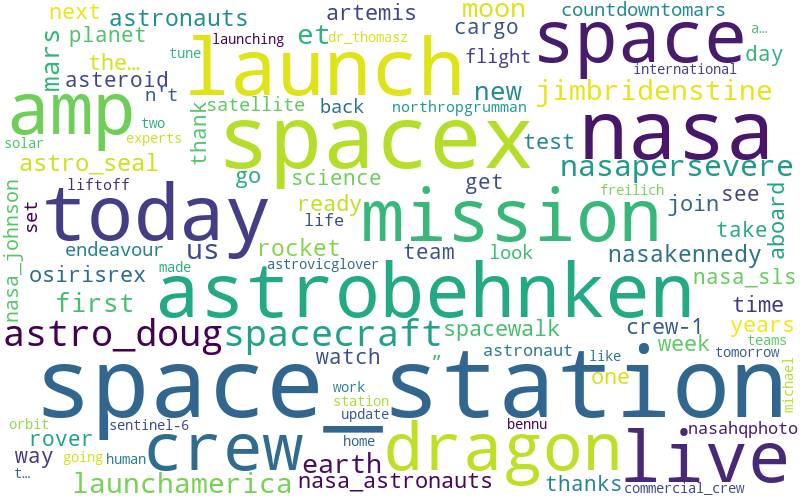

In [25]:
from wordcloud import WordCloud 
from IPython.display import Image

wc = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc.generate_from_frequencies(counter1) #dictionary 받아야함
wc.to_file(f"{outcome_folder}/wordcloud_100.png")
Image(filename=f"{outcome_folder}/wordcloud_100.png")

11\. Select from `df` the rows with the polarity score larger than or equal to 0.7, i.e., strongly positive tweets. List the top-50 most common words in the selected text along with their frequencies, reusing the global and local stopwords defined earlier. 

In [26]:
# Your answer here
from collections import Counter

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    #for k in dataframe.polarity>=0.7:
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)
        
    return counter

global_stopwords = nltk.corpus.stopwords.words("english") 
positive_df = df[df.polarity>=0.7]
counter2 = get_counter(positive_df, global_stopwords+local_stopwords)
counter2.most_common(50)

[('space_station', 24),
 ('spacex', 22),
 ('great', 21),
 ('happy', 18),
 ('good', 17),
 ('today', 16),
 ('jimbridenstine', 14),
 ('nasa', 14),
 ('welcome', 13),
 ('us', 12),
 ('et', 12),
 ('launch', 12),
 ('successfully', 11),
 ('successful', 11),
 ('fly', 10),
 ('astrobehnken', 10),
 ('dragon', 9),
 ('space', 9),
 ('nasa_astronauts', 9),
 ('crew', 9),
 ('astro_doug', 9),
 ('launchamerica', 9),
 ('amp', 8),
 ('thank', 8),
 ('spacecraft', 8),
 ('best', 7),
 ('look', 7),
 ('nasakennedy', 7),
 ('beautiful', 6),
 ('day', 6),
 ('team', 6),
 ('moon', 5),
 ('go', 5),
 ('proud', 5),
 ('aboard', 5),
 ('mission', 5),
 ('congratulations', 5),
 ('gorgeous', 5),
 ('astronauts', 5),
 ('perfect', 5),
 ('2', 4),
 ('family', 4),
 ('excellent', 4),
 ('cargo', 4),
 ('work', 4),
 ('think', 4),
 ('nasahqphoto', 4),
 ('earth', 4),
 ('tune', 4),
 ('artemis', 4)]

[링크 텍스트](https://)12\. Draw a word cloud that visualizes the top-100 most common words in the strongly positive tweets.

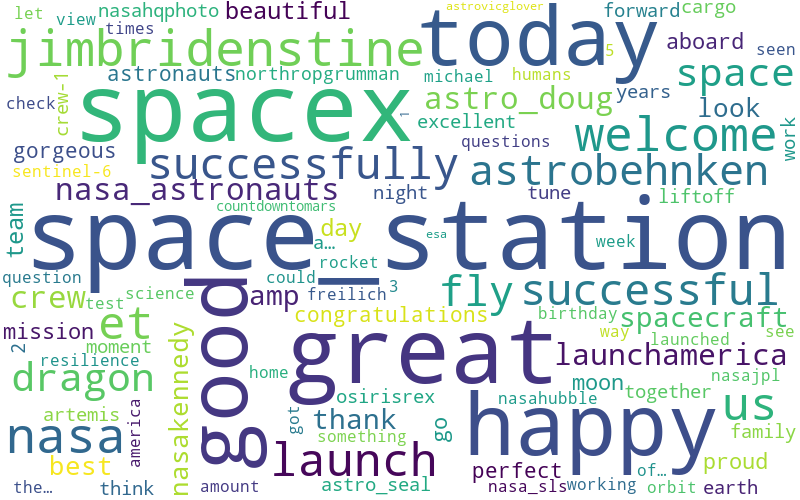

In [27]:
# Your answer here
wc2 = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc2.generate_from_frequencies(counter2)
wc2.to_file(f"{outcome_folder}/wordcloud_200.png")
Image(filename=f"{outcome_folder}/wordcloud_200.png")

13\. Select from `df` the rows with the polarity score larger than or equal to 0.7, i.e., strongly positive tweets. List the top-50 most common <b>adjectives</b> in the selected text along with their frequencies, reusing the global and local stopwords defined earlier. 

In [28]:
# Your answer here
positive_df = df[df.polarity>=0.7]
counter3 = get_counter(positive_df, global_stopwords+local_stopwords, "JJ")
counter3.most_common(50)

[('good', 16),
 ('happy', 16),
 ('great', 12),
 ('successful', 11),
 ('best', 6),
 ('beautiful', 4),
 ('proud', 3),
 ('gorgeous', 3),
 ('perfect', 3),
 ('of…', 2),
 ('incredible', 2),
 ('so…', 2),
 ('bright', 2),
 ('nasahubble', 2),
 ('fascinating', 2),
 ('welcome', 2),
 ('the…', 2),
 ('n…', 1),
 ('solar', 1),
 ('amazing', 1),
 ('core', 1),
 ('excellent', 1),
 ('upgraded', 1),
 ('😉', 1),
 ('northern', 1),
 ('spectacular', 1),
 ('app', 1),
 ('celestial', 1),
 ('🌟', 1),
 ('👩🏻\u200d🚀💫', 1),
 ('asteroid', 1),
 ('f…', 1),
 ('yummy', 1),
 ('tasty', 1),
 ('d…', 1),
 ('cosmic', 1),
 ('nom', 1),
 ('delicious', 1),
 ('u.s-european', 1),
 ('sentinel-6', 1),
 ('🚀🥳', 1),
 ('scientific', 1),
 ('incredible.', 1),
 ('with…', 1),
 ('lower', 1),
 ('more…', 1),
 ('many', 1),
 ('continued', 1),
 ('intens…', 1),
 ('remarkable', 1)]

14\. Draw a word cloud that visualizes the top-100 most common adjectives in the strongly positive tweets.

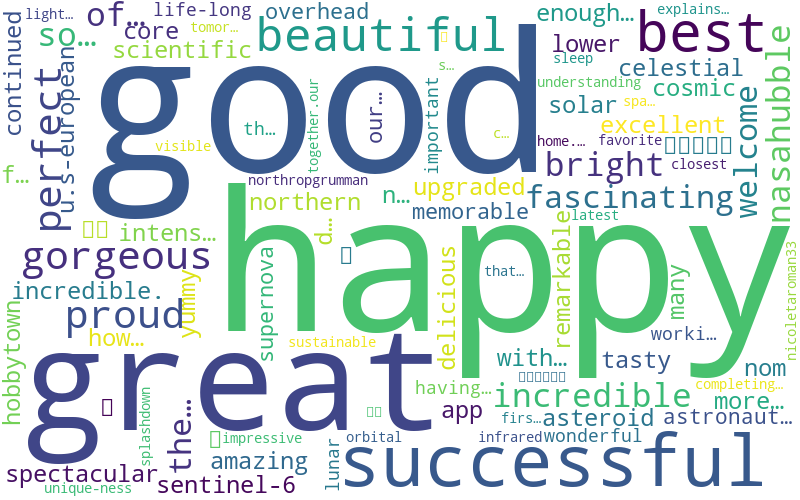

In [29]:
# Your answer here
wc3 = WordCloud(background_color="white", max_words=100, width=800, height=500)
wc3.generate_from_frequencies(counter3)
wc3.to_file(f"{outcome_folder}/wordcloud_300.png")
Image(filename=f"{outcome_folder}/wordcloud_300.png")